In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging, utilities

ema_logging.log_to_stderr(ema_logging.INFO)

C:\Users\newbi\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\newbi\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


<Logger EMA (DEBUG)>

In [4]:
results = utilities.load_results('Outcomes/1000ScenariosBaseCase.csv')

experiments, outcomes = results
outcomes = pd.DataFrame(outcomes)
experiments = pd.DataFrame(experiments)
results = experiments.join(outcomes)
results = results.drop(columns="model")
# results = results.apply(pd.to_numeric)
results.head()

[MainProcess/INFO] results loaded succesfully from C:\Users\newbi\project-local\Model-based-decision-making\Outcomes\1000ScenariosBaseCase.csv


A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
0                     64.0  341.707998      10.0   0.008967  329.059434   
1                     49.0  270.516534       1.0   0.389864   64.116779   
2                    109.0  217.092157       1.0   0.720433  119.844801   
3                    106.0  314.195207       1.0   0.000931  149.934556   
4                    123.0  331.097660       1.5   0.138750  275.055604   

  A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail  ...  \
0       1.0   0.671443   46.836038       1.0   0.541864  ...   
1       1.0   0.458602  211.600292       1.5   0.030226  ...   
2       1.5   0.445405  332.843340      10.0   0.123183  ...   
3      10.0   0.203409  177.126583       1.5   0.900999  ...   
4       1.0   0.296295  172.209395       1.5   0.888339  ...   

   A.3_Dike Investment Costs 2 A.3_Expected Number of Deaths 2  \
0                            0                        0.000000   
1                            0                        1.053592   
2                            0                        1.091069   
3                            0                        0.000000   
4                            0                        0.000000   

   A.4_Expected Annual Damage 2  A.4_Dike Investment Costs 2  \
0                           0.0                            0   
1                           0.0                            0   
2                           0.0                            0   
3                           0.0                            0   
4                           0.0                            0   

  A.4_Expected Number of Deaths 2  A.5_Expected Annual Damage 2  \
0                             0.0                           0.0   
1                             0.0                           0.0   
2                             0.0                           0.0   
3                             0.0                           0.0   
4                             0.0                           0.0   

  A.5_Dike Investment Costs 2 A.5_Expected Number of Deaths 2  \
0                           0                             0.0   
1                           0                             0.0   
2                           0                             0.0   
3                           0                             0.0   
4                           0                             0.0   

  RfR Total Costs 2  Expected Evacuation Costs 2  
0               0.0                          0.0  
1               0.0                          0.0  
2               0.0                          0.0  
3               0.0                          0.0  
4               0.0                          0.0  

[5 rows x 103 columns]

In [5]:
# Aggregate the outcomes (no location and no time step)

def aggregate_outcomes(results, outcome):
    list_outcomes_columns = []
    
    for i in results.columns:
        if outcome in i:
            list_outcomes_columns.append(i)
            
    results["Total " + str(outcome)] = results[list_outcomes_columns].sum(axis = 1)
            
#     print(list_outcomes_columns)

In [6]:
aggregate_outcomes(results, "Expected Number of Deaths")
aggregate_outcomes(results, "Expected Annual Damage")

In [7]:
#  results.columns

In [8]:
def boxplot_histogram_maker(results):
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    outcomes_list = ["Total Expected Number of Deaths", "Total Expected Annual Damage"]
    
    for i, (ax, outcome) in enumerate(zip(axes.flatten(), outcomes_list)):
        ax.boxplot(results[outcome])
        print(str(outcome) + " First quantile: " + str(results[outcome].quantile(q = 0.25)))
        print(str(outcome) + " Mean: " + str(results[outcome].mean()))
        
    plt.show()
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    
    for i, (ax, outcome) in enumerate(zip(axes.flatten(), outcomes_list)):
        ax.hist(results[outcome])
        ax.set_title(outcome)

Total Expected Number of Deaths First quantile: 0.614663518226044
Total Expected Number of Deaths Mean: 1.61575355331798
Total Expected Annual Damage First quantile: 583888960.7998052
Total Expected Annual Damage Mean: 1678899372.4850564


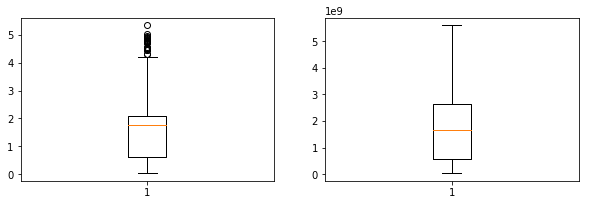

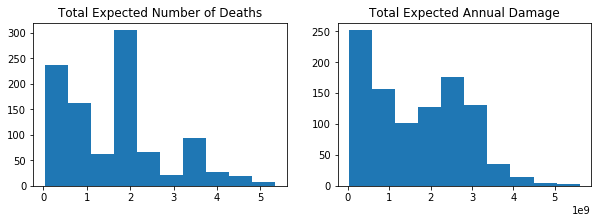

In [9]:
boxplot_histogram_maker(results)

### PRIM Analysis

In [10]:
# Set the input and output parameters
# Make sure the outputs are binary (0/1), and specify your interested cases

x = results.iloc[:, :19]
y_deaths = results["Total Expected Number of Deaths"].values
y_deaths = y_deaths < 1

[MainProcess/INFO] 1000 points remaining, containing 384 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.252, coverage: 0.65625, density: 1.0 restricted_dimensions: 3


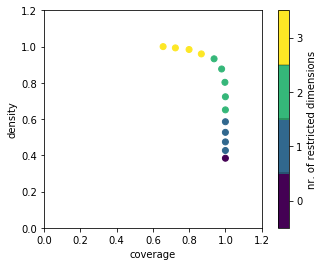

In [22]:
prim_alg = prim.Prim(x, y_deaths, threshold=0.65, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

coverage    0.65625
density           1
id               13
mass          0.252
mean              1
res_dim           3
Name: 13, dtype: object

             box 13                                         
                min       max                      qp values
A.1_pfail  0.463835  0.999122  [5.837528821014312e-56, -1.0]
A.3_pfail  0.456845  0.999879  [3.469973631184308e-47, -1.0]
A.5_pfail  0.115157  0.999596   [0.004515647701651233, -1.0]



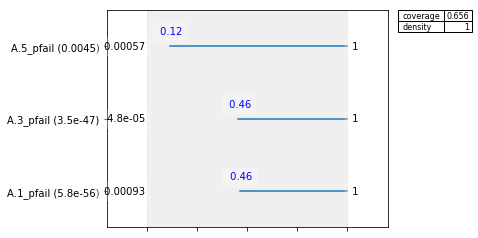

In [23]:
box1.inspect()
box1.inspect(style='graph')
plt.show()

Input the box:  13


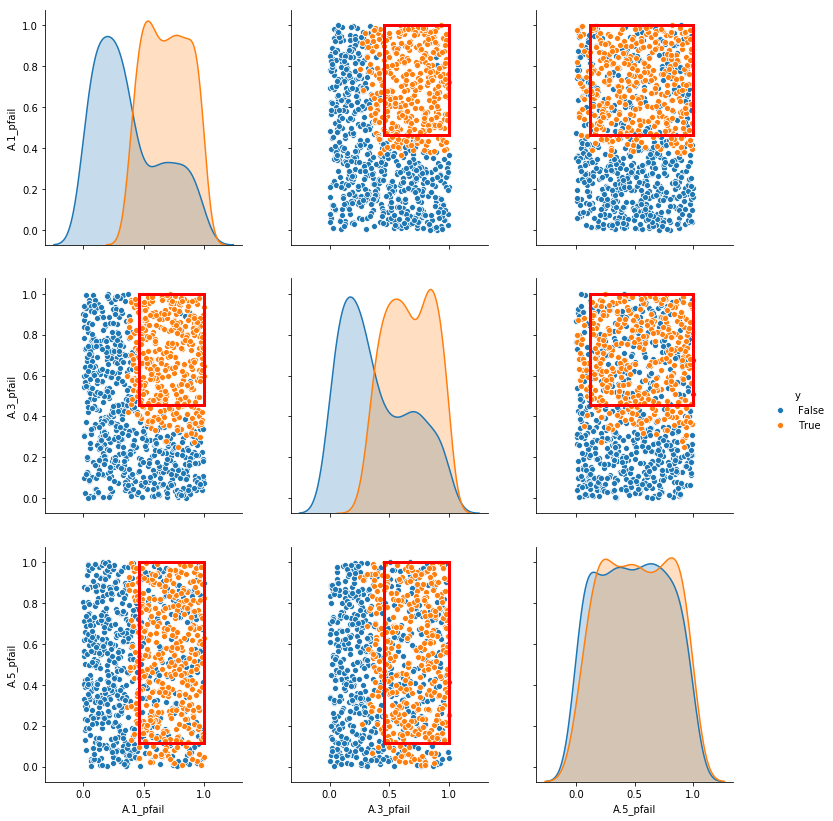

In [24]:
box = int(input("Input the box: "))
box1.select(box)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [ ]:
# Coverage is the points of interests in the red box 
# Density is fraction of cases in the box

# prim_alg = prim.Prim(x, y_deaths, threshold=0.65, peel_alpha=0.1)
# box1 = prim_alg.find_box()

# box1.select(19)
# box1.show_pairs_scatter()
# fig = plt.gcf()
# fig.set_size_inches(12,12)
# plt.show()

In [17]:
# box2 = prim_alg.find_box()

NameError: name 'prim_alg' is not defined

In [ ]:
# box2.select(-1)
# fig = box2.show_pairs_scatter()
# # fig = plt.gcf()
# fig.set_size_inches(12,12)
# plt.show()

In [ ]:
print(prim_alg.stats_to_dataframe())
print(prim_alg.boxes_to_dataframe())

### Dimensional Stacking

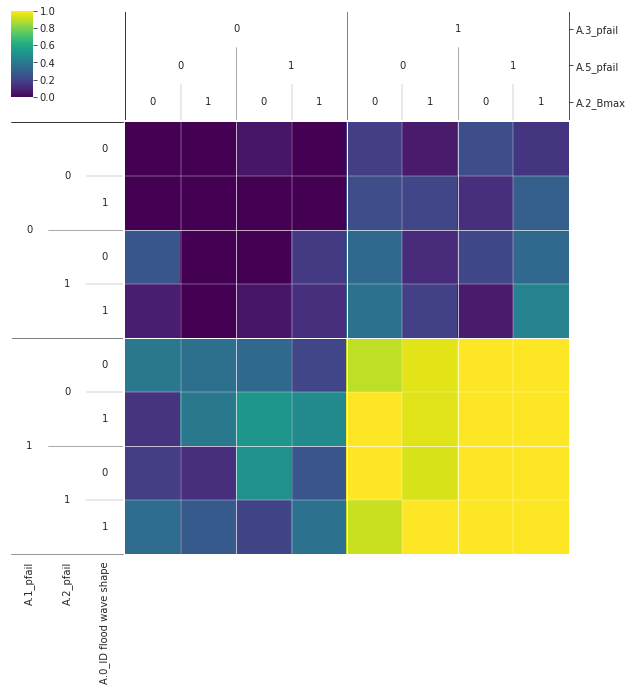

In [25]:
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(x, y_deaths, 3, nbins = 2)
plt.show()

### Cart Analysis

       coverage   density   mass  res dim
box 1  0.000000  0.000000  0.340        1
box 2  0.013021  0.100000  0.050        1
box 3  0.000000  0.000000  0.156        2
box 4  0.026042  0.172414  0.058        2
box 5  0.093750  0.720000  0.050        3
box 6  0.111979  0.826923  0.052        3
box 7  0.119792  0.920000  0.050        4
box 8  0.635417  1.000000  0.244        4
                 box 1                  box 2                  box 3  \
                   min       max          min       max          min   
A.1_pfail  0.000930847  0.339937     0.339937  0.389984     0.389984   
A.2_pfail  0.000528132  0.999189  0.000528132  0.999189  0.000528132   
A.3_pfail  4.78221e-05  0.999879  4.78221e-05  0.999879  4.78221e-05   
A.5_pfail  0.000570945  0.999596  0.000570945  0.999596  0.000570945   

                           box 4                  box 5            \
                max          min       max          min       max   
fig = cart_alg.show_tree()
fig.set_size_inches(20, 

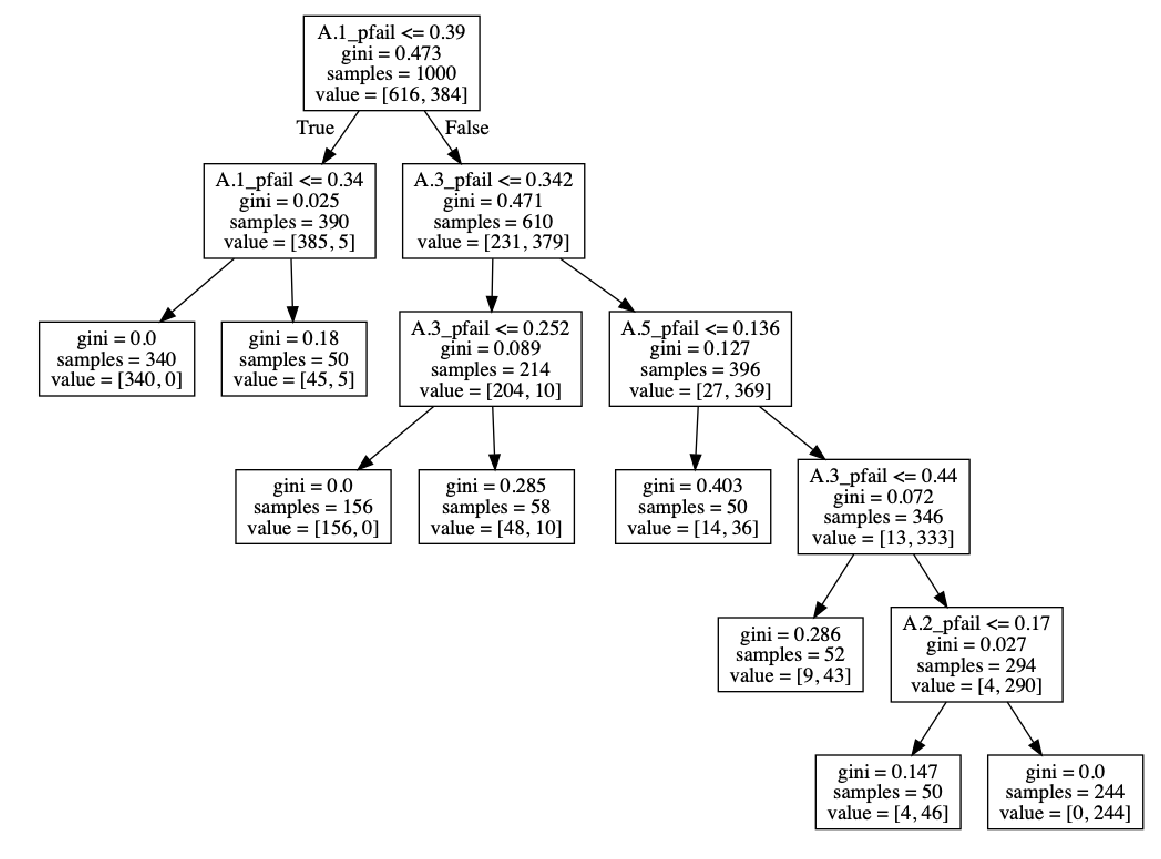

In [30]:
from ema_workbench.analysis import cart
cart_alg = cart.CART(x, y_deaths, 0.05)
cart_alg.build_tree()

print(cart_alg.stats_to_dataframe())
print(cart_alg.boxes_to_dataframe())

cart_alg.show_tree()
fig = plt.gcf()
fig.figure(figsize = 12, 12)
plt.show()

In [ ]:
experiments.columns

In [ ]:
experiments, outcomes = utilities.load_results('Outcomes/400Scenarios75Policies.csv')
experiments = experiments.drop(columns = "model")
experiments = pd.DataFrame(experiments)
outcomes = pd.DataFrame(outcomes)


# from ema_workbench.analysis import feature_scoring
# scores = feature_scoring.get_feature_scores_all(experiments, outcomes)
# sns.heatmap(scores)
# plt.show()

In [ ]:
experiments.columns

In [ ]:
def column_finder(location):    
    list_loc = []

    for i in experiments.columns:
        if location in i:
            list_loc.append(i)
            
    a = "A.1"[-1]
    a = int(a) - 1
            
    for i in experiments.columns:
        if str(a) + "_RfR" in i:
            list_loc.append(i)
            
    list_loc.extend(["A.0_ID flood wave shape", "discount rate 0", "discount rate 1", "discount rate 2"])
            
    global x 
    x = experiments[list_loc]

    list_loc_2 = []
    
    for i in outcomes.columns:
        if location in i:
            list_loc_2.append(i)
            
    global y 
    y = outcomes[list_loc_2]

In [ ]:
column_finder("A.1")

In [ ]:
x.columns

In [ ]:
from ema_workbench.analysis import feature_scoring
fs = feature_scoring.get_feature_scores_all(x, y)
fig = plt.subplots(figsize=(10,10))
sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()